# 2293100 백승호 AI인공지능학과
주제: 날씨예측

## 1. 필요한 라이브러리 임포트

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


<a href="https://www.kaggle.com/datasets/bhanupratapbiswas/weather-data">데이터셋 링크:https://www.kaggle.com/datasets/bhanupratapbiswas/weather-data</a>

## 2. 데이터 로드 및 확인


인공신경망(ANN)을 선택한 이유
복잡한 비선형 관계 처리: ANN은 다층 구조와 활성화 함수를 사용해 복잡한 비선형 패턴을 잘 학습할 수 있다. 특히, 데이터가 고차원의 연속형 입력 변수로 이루어져 있을 때 적합.

다중 클래스 분류: ANN은 자연스럽게 다중 클래스 분류 문제를 처리할 수 있도록 설계되어 있다. 특히, softmax 출력을 활용해 확률로 결과를 반환함.

데이터 전처리 및 확장 가능성: ANN은 다양한 데이터 전처리 및 변환 방식(예: 정규화, 원-핫 인코딩)을 활용할 수 있고, 이미지나 시계열 데이터 등 확장 가능성이 높음.

모델의 커스터마이징: 레이어 수, 뉴런 수, 활성화 함수, 드롭아웃 등을 사용자가 원하는 대로 설정할 수 있어 모델을 세밀하게 조정할 수 있음.

In [6]:
# CSV 파일 불러오기
file_path = 'Weather Datasets.csv'
try:
    data = pd.read_csv(file_path)
    print(f"Successfully loaded dataset: {file_path}")
except FileNotFoundError:
    print(f"Error: File {file_path} not found. Please make sure the file exists in the same directory as this script.")
    exit()

# 데이터 확인
print("Dataset Preview:")
print(data.head())


Successfully loaded dataset: Weather Datasets.csv
Dataset Preview:
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


## 3. 데이터 전처리

In [13]:
# 입력 및 출력 컬럼 설정
input_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
output_column = 'Weather'

# 데이터 정제 및 인코딩
data = data[input_columns + [output_column]].dropna()
label_encoder = LabelEncoder()
data['Weather_encoded'] = label_encoder.fit_transform(data[output_column])
X = data[input_columns]
y = to_categorical(data['Weather_encoded'])

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. 상관 행렬 계산 및 시각화

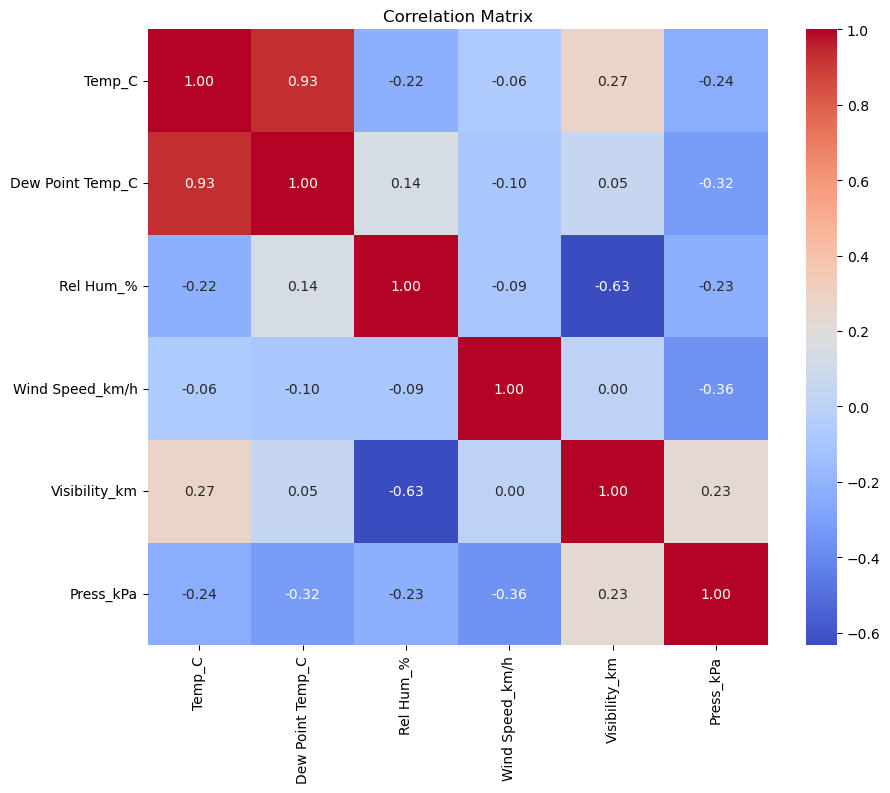

In [16]:
# 상관 행렬 생성 및 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = pd.DataFrame(X, columns=input_columns).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 5. 모델 구성 및 학습

In [19]:
# 모델 구성
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping 및 Learning Rate Scheduler 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


C:\Users\LG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2597 - loss: 2.4084 - val_accuracy: 0.3483 - val_loss: 1.6489 - learning_rate: 0.0010
Epoch 2/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3409 - loss: 1.6424 - val_accuracy: 0.3711 - val_loss: 1.5731 - learning_rate: 0.0010
Epoch 3/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3562 - loss: 1.5837 - val_accuracy: 0.3916 - val_loss: 1.5409 - learning_rate: 0.0010
Epoch 4/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3742 - loss: 1.5787 - val_accuracy: 0.3842 - val_loss: 1.5386 - learning_rate: 0.0010
Epoch 5/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3803 - loss: 1.5123 - val_accuracy: 0.3904 - val_loss: 1.5147 - learning_rate: 0.0010
Epoch 6/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3840 - loss: 1.5187 - val_accuracy: 0.3847 - val_loss: 1.5030 - learning_rate: 0.0010
Epoch 7/200
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3855 - loss: 1.

## 6. 모델 평가

In [22]:
# 테스트 데이터 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.43


## 7. 학습 결과 시각화

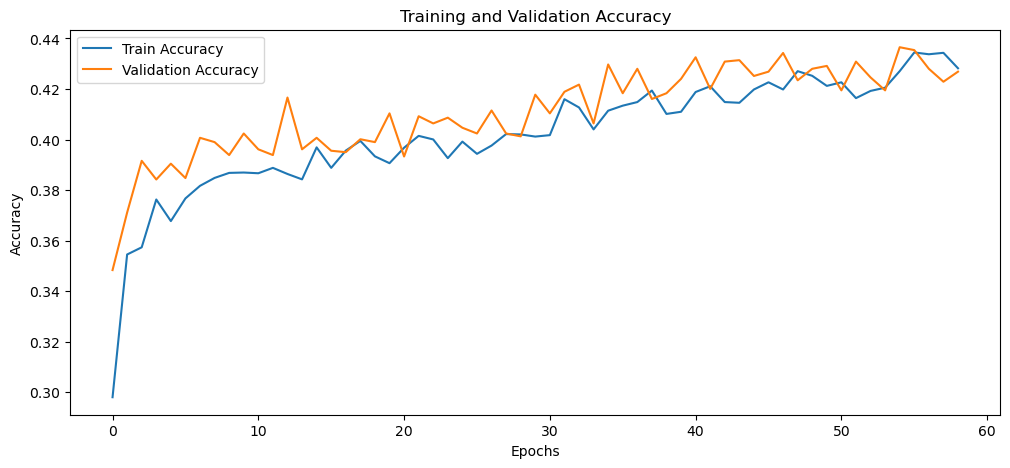

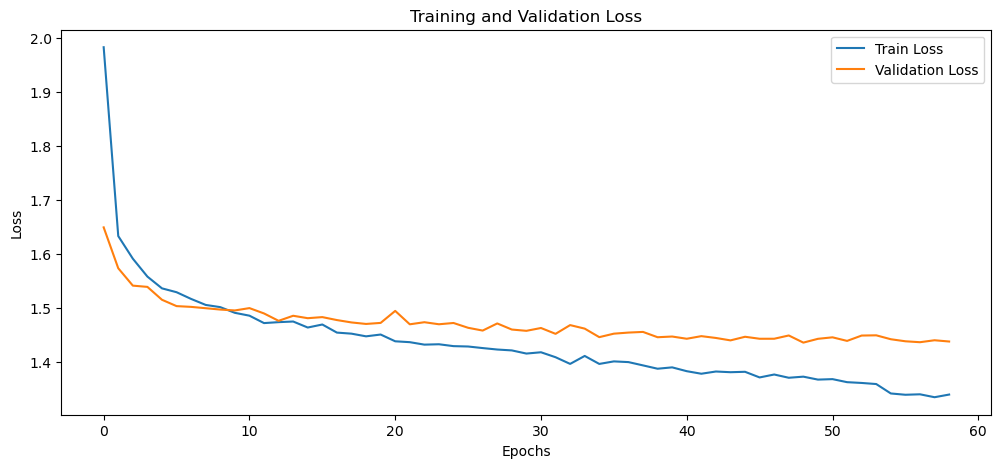

In [25]:
# 학습 정확도 및 손실 시각화
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## 8. 혼동 행렬 생성 및 시각화

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


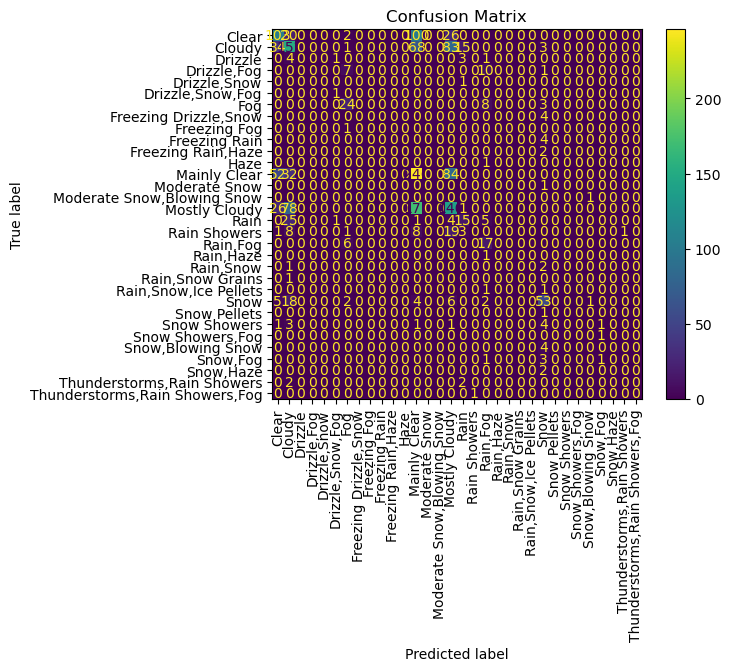

In [28]:
# 혼동행렬 계산 및 시각화
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 실제 등장한 클래스만 필터링
present_classes = np.unique(y_true_classes)
filtered_labels = [label_encoder.classes_[i] for i in present_classes]

# 혼동행렬 생성 및 시각화
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, labels=present_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=filtered_labels)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


## 9. 클래스 매핑 출력

In [31]:
# 클래스 매핑 정보 출력
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")


0: Clear
1: Cloudy
2: Drizzle
3: Drizzle,Fog
4: Drizzle,Ice Pellets,Fog
5: Drizzle,Snow
6: Drizzle,Snow,Fog
7: Fog
8: Freezing Drizzle
9: Freezing Drizzle,Fog
10: Freezing Drizzle,Haze
11: Freezing Drizzle,Snow
12: Freezing Fog
13: Freezing Rain
14: Freezing Rain,Fog
15: Freezing Rain,Haze
16: Freezing Rain,Ice Pellets,Fog
17: Freezing Rain,Snow Grains
18: Haze
19: Mainly Clear
20: Moderate Rain,Fog
21: Moderate Snow
22: Moderate Snow,Blowing Snow
23: Mostly Cloudy
24: Rain
25: Rain Showers
26: Rain Showers,Fog
27: Rain Showers,Snow Showers
28: Rain,Fog
29: Rain,Haze
30: Rain,Ice Pellets
31: Rain,Snow
32: Rain,Snow Grains
33: Rain,Snow,Fog
34: Rain,Snow,Ice Pellets
35: Snow
36: Snow Pellets
37: Snow Showers
38: Snow Showers,Fog
39: Snow,Blowing Snow
40: Snow,Fog
41: Snow,Haze
42: Snow,Ice Pellets
43: Thunderstorms
44: Thunderstorms,Heavy Rain Showers
45: Thunderstorms,Moderate Rain Showers,Fog
46: Thunderstorms,Rain
47: Thunderstorms,Rain Showers
48: Thunderstorms,Rain Showers,Fog
49: 

##### ChatGPT 도움 받은 내용
문제: Weather 열 데이터의 다중 클래스 분류 처리 Weather 열이 문자열 데이터라 직접 모델에 입력할 수 없었음. 


해결: ChatGPT의 제안으로 Label Encoding과 One-Hot Encoding을 적용하여 데이터를 모델 학습에 적합한 형태로 변환.

문제: 모델 학습 중 과적합 발생 학습 정확도는 높았지만, 검증 데이터에 대한 정확도가 낮아 과적합 문제가 의심됨. 


해결: ChatGPT가 Dropout 레이어 추가와 Early Stopping, Learning Rate Scheduler를 활용하도록 제안하여 과적합을 줄임.

문제: 학습 결과 평가 및 성능 시각화 학습 결과와 검증 결과를 비교하거나, 예측 성능을 평가하는 데 어려움이 있었음. 


해결: ChatGPT가 학습 및 검증 정확도, 손실 그래프 생성 코드를 제공. 또한, 혼동행렬을 생성하여 예측 성능을 시각적으로 평가할 수 있는 방법을 제안.

문제: 모델의 출력 클래스에 대한 이해 모델이 출력하는 숫자 값이 무엇을 의미하는지 이해하기 어려웠음. 


해결: ChatGPT가 Label Encoder를 통해 숫자와 기상 상태(Class)의 매핑 정보를 출력하도록 제안.

-정확도가 43%밖에 안되는 이유:

제가 찾은 데이터셋 클래스가 불균형하여, 특정 클래스에 편향되어 예측을 했기 때문입니다. 
데이터셋이 특히 0번 Clear와 1번 Cloudy에 너무 집중되어 있었습니다. 날씨가 보통 CLear하거나 CLoudy한 날이 다른 날들에 비해 평균적으로 많아서 어쩔 수 없는 부분도 있습니다.

https://chatgpt.com/share/67580f61-e294-8012-880d-f542bcd58be9